# Fraudulent Transaction Detection

In the banking or payment industry, fraud involves the illegal usage of credit card details without the knowledge of the real cardholder. Most often, a stolen credit card or card number is the root cause of a fraudulent charge. When a cardholder notices a payment transaction they did not make on their credit card statement, they have the right to dispute the charge by contacting their bank. Following this, the bank or credit card company initiates an investigation and returns the money to the cardholder.

But what if we could detect fraudulent transaction activity in real-time? By doing so, we could take immediate action to prevent further fraudulent activities.

Machine learning techniques can play a vital role in detecting fraudulent transactions.

---


## Isolation Forest

Isolation Forests are similar to Random Forests as they are built based on decision trees. However, unlike Random Forests, Isolation Forests are designed for unsupervised anomaly detection.

The underlying concept of Isolation Forests is that anomalies or outliers are data points that are both "few and different" compared to the majority of data points.

In an Isolation Forest, randomly sub-sampled data is processed in a tree-like structure, where features are randomly selected at each split. The sub-samples that travel deeper into the tree are less likely to be anomalies, as they require more splits to isolate them. Conversely, data points that end up in shorter branches of the tree indicate anomalies, as they were easier for the tree to separate from other observations.

Isolation Forests are an effective technique for detecting anomalies in datasets, making them valuable for various applications, including fraud detection.

---


<div>
<img src="attachment:image.png" width="800"/>
</div>

### Importing required libraries

In [26]:
# Importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### Importing the credit card transactional dataset

In [2]:
# Reading the data
transaction_data = pd.read_csv(r"C:\Users\being\Downloads\credit_card_transactional_data.csv")
transaction_data.head(10)

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.77778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0
5,37515.55556,7.192,-6.944700,-0.136388,0.543172,-0.024708,0.112116,1.647884,-0.003729,0.039702,0.097664,-0.341836,-274.000000,-0.056484,0
6,34078.88889,10.320,133.000000,-0.540177,8.803812,-0.007307,-67.000000,1.709944,-0.316351,-0.003741,0.187718,NaN,0.338621,0.227839,0
7,58923.33333,1.584,-0.670264,-0.164626,-8.848897,0.002278,0.078981,1.143923,-472.000000,0.010555,0.065275,0.029735,-0.396261,-0.182626,0
8,166341.11110,100.000,1.984216,0.416604,-178.000000,-0.003641,53.000000,NaN,0.109451,0.022316,-0.039217,0.438853,-0.184313,0.643273,0
9,175154.44440,0.712,5.857276,-0.073466,0.667938,-0.000891,-0.012069,1.427191,-101.000000,-0.038324,0.014183,-0.109039,0.420946,-61.000000,0


In [3]:
# Checking data information
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [4]:
# Checking class distribution of the target variable
transaction_data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

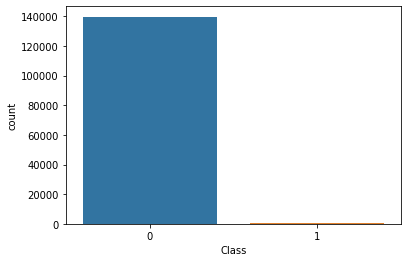

In [5]:
# Plot to visualize class distribution of the target variable
sns.countplot(x='Class',data=transaction_data)

### Lets get more details about the data 

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [7]:
# Summary statistics for the 'transaction_data' DataFrame
transaction_data.describe()


,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
count,140000.000000,140000.000000,116232.000000,129731.000000,129693.000000,140000.000000,129678.000000,116529.000000,125595.000000,129645.000000,140000.000000,129891.000000,125695.000000,125833.000000,140000.000000
mean,105334.592698,71.102883,-13.647954,-15.797094,-16.141105,0.000037,-15.540173,-13.681959,-14.760374,-16.067148,0.000119,-16.029764,-15.500080,-15.491673,0.001807
std,52763.641695,212.359700,224.599903,72.631165,74.585111,0.031540,72.120519,230.871123,235.313604,73.148242,0.215636,73.378542,237.289210,236.485713,0.042472
min,0.000000,0.000000,-2000.000000,-500.000000,-500.000000,-0.212540,-500.000000,-2000.000000,-1999.000000,-500.000000,-1.544515,-500.000000,-1998.000000,-2000.000000,0.000000
25%,60107.500002,4.400000,-6.419730,-0.262951,-9.288367,-0.017731,-0.205542,-1.149444,-0.108129,-0.033800,-0.143551,-0.509781,-0.277642,-0.596404,0.000000
50%,94276.111110,17.584000,-1.250014,-0.019520,-1.739613,-0.000140,0.000903,0.279868,0.023023,-0.005629,0.003731,-0.062414,-0.019975,0.007491,0.000000
75%,154845.833375,61.522000,5.063801,0.220734,6.436411,0.017776,0.206203,1.092373,0.109777,0.022194,0.140835,0.327266,0.224548,0.507399,0.000000
max,191985.555600,20552.928000,2000.000000,100.000000,196.401291,0.278668,100.000000,1999.000000,1998.000000,100.000000,0.858579,100.000000,2000.000000,1999.000000,1.000000


### How many null values are present?

In [8]:
# Checking for null values
transaction_data.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

### Imputing null values with median so that it doesnt get affected by outliers

In [9]:
# Imputing null values with median
transaction_data = transaction_data.fillna(transaction_data.median())

In [10]:
# Rechecking for null values
transaction_data.isnull().sum()

Timestamp    0
Value        0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
C10          0
C11          0
C12          0
Class        0
dtype: int64

### Lets find out if there is any correlation between the variables

<AxesSubplot:>

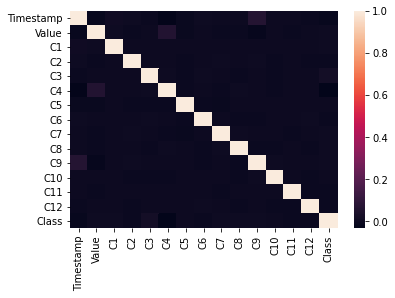

In [11]:
# Plotting heatmap to check correlation between variables
sns.heatmap(transaction_data.corr())

In [12]:
# Calculating correlation values between variables
transaction_data.corr()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
Timestamp,1.000000,-0.010465,0.010990,0.004186,-0.001112,-0.026449,-0.005723,0.004022,0.001288,0.000226,0.067799,-0.000403,0.001204,-0.001168,-0.009994
Value,-0.010465,1.000000,0.006463,-0.001535,-0.000205,0.061557,-0.005582,0.000225,-0.001804,-0.003026,-0.014649,0.003132,-0.001535,0.003082,0.007095
C1,0.010990,0.006463,1.000000,0.002645,0.001899,0.000136,0.002116,0.001407,0.001284,0.002912,-0.000376,0.000773,0.000843,0.000137,0.007301
C2,0.004186,-0.001535,0.002645,1.000000,0.002597,0.001642,-0.001658,0.000866,0.004249,0.000065,0.004493,-0.000713,0.000900,-0.003174,-0.001013
C3,-0.001112,-0.000205,0.001899,0.002597,1.000000,0.005303,-0.001218,0.006360,0.001056,-0.001402,0.003368,-0.000885,0.002448,0.002028,0.023299
C4,-0.026449,0.061557,0.000136,0.001642,0.005303,1.000000,-0.003174,0.002643,-0.000741,0.003894,0.002401,-0.001671,0.000261,0.001615,-0.032692
C5,-0.005723,-0.005582,0.002116,-0.001658,-0.001218,-0.003174,1.000000,-0.001140,-0.005153,0.002597,0.000955,0.002331,0.002178,0.003266,0.002595
C6,0.004022,0.000225,0.001407,0.000866,0.006360,0.002643,-0.001140,1.000000,0.002850,-0.003772,-0.001691,-0.000009,0.001180,0.005680,-0.003851
C7,0.001288,-0.001804,0.001284,0.004249,0.001056,-0.000741,-0.005153,0.002850,1.000000,0.006721,0.003435,0.000374,-0.002095,0.000720,0.006152
C8,0.000226,-0.003026,0.002912,0.000065,-0.001402,0.003894,0.002597,-0.003772,0.006721,1.000000,-0.002122,-0.000996,0.002828,-0.000902,0.004237


### Target variable class distribution 

In [13]:
transaction_data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

### We need to find out contamination amount for isolation forest

In [14]:
# Separating the dataset into Fraud and Valid transactions based on the 'Class' column
Fraud = transaction_data[transaction_data['Class'] == 1]  # 1 (Fraud)
Valid = transaction_data[transaction_data['Class'] == 0]  # 0 (Valid)

# Calculating the contamination score
contamination = len(Fraud) / float(len(Valid))  # Contamination = (Number of Fraud / Number of Valid)


In [15]:
print(contamination)

print("Fraud Class : {}".format(len(Fraud)))

print("Normal Class : {}".format(len(Valid)))

0.0018104145348379571
Fraud Class : 253
Normal Class : 139747


In [16]:
contamination

0.0018104145348379571

### Data Modelling with Isolation Forest

In [17]:
# Separating features (X) and the target variable (y)
X = transaction_data.drop('Class', axis=1)  
y = transaction_data['Class'] 


In [19]:
# Creating an Isolation Forest classifier with specific hyperparameters
clf = IsolationForest(
    n_estimators=500,           # Number of base estimators (trees) in the forest
    max_samples=len(X),         # The number of samples to draw from X to build each tree
    contamination=0.0018       # The proportion of outliers or anomalies expected in the dataset
)


In [20]:
# Fitting (training) the Isolation Forest classifier
clf.fit(X)


IsolationForest(contamination=0.0018, max_samples=140000, n_estimators=500)

In [21]:
# Calculating decision scores for each data point in the feature set X
scores_prediction = clf.decision_function(X)

In [22]:
scores_prediction

array([0.16121013, 0.13283997, 0.1414073 , ..., 0.13469703, 0.16736272,
       0.16206512])

<AxesSubplot:>

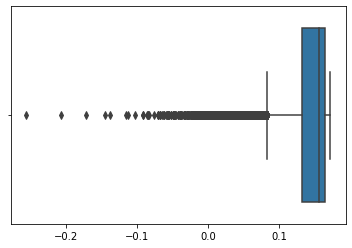

In [23]:
# Creating a boxplot of the decision scores
sns.boxplot(scores_prediction)


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        7.0000e+00, 4.0000e+00, 8.0000e+00, 7.0000e+00, 7.0000e+00,
        1.0000e+01, 1.2000e+01, 1.5000e+01, 3.8000e+01, 3.7000e+01,
        3.1000e+01, 7.5000e+01, 6.2000e+01, 8.1000e+01, 1.1900e+02,
        1.3000e+02, 1.7300e+02, 2.1900e+02, 2.9300e+02, 3.5100e+02,
        4.5400e+02, 5.2300e+02, 6.2200e+02, 7.8400e+02, 9.3300e+02,
        1.1860e+03, 1.5090e+03, 1.9300e+03, 2.6880e+03, 3.6620e+03,
        4.6750e+03, 5.5300e+03, 6.2630e+03, 6.4800e+03, 6.8520e+03,
        8.0720e+03, 1.1207e+04, 1.7935e+04, 3.0732e+04, 2.6269e+04]),
 array([-0.25596921, -0.24985463, -0.24374006,

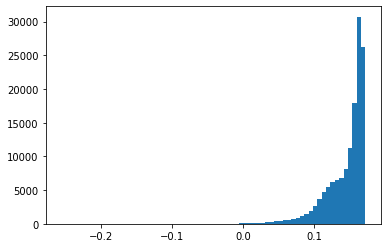

In [27]:
# Creating a histogram of the decision scores with 70 bins for a detailed distribution view
plt.hist(scores_prediction, bins=70)

In [28]:
# Adding a new column 'scores' to the 'transaction_data'
transaction_data['scores'] = scores_prediction


In [29]:
transaction_data

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,scores
0,152212.22220,1.816,13.245219,-0.019520,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0,0.161210
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,0.023023,0.062966,0.130546,-0.303582,-0.019975,0.007491,0,0.132840
2,43127.77778,24.000,-9.067399,0.762501,-1.739613,0.052481,-0.101681,-88.000000,0.117912,-0.005629,0.358812,-0.367016,-0.019975,361.000000,0,0.141407
3,156042.22220,8.000,8.728304,-0.382673,-1.739613,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-0.019975,-1.654373,0,0.131041
4,154720.00000,59.496,7.657141,0.150611,-1.739613,-0.034883,0.826100,0.357556,0.147640,-0.005629,0.080491,-0.693792,-0.308631,0.563570,0,0.166806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,183231.11110,102.680,26.000000,-0.230035,-7.050312,0.017126,0.101611,2.443864,-0.068998,0.159159,-0.106062,0.342779,-0.011073,0.809047,0,0.160241
139996,169976.66670,9.848,5.329287,-0.151293,8.303946,-0.004504,-0.040837,1.323421,0.083422,0.007135,-0.179373,-0.157173,0.318506,-1.106630,0,0.166070
139997,40377.77778,3.072,-4.025570,-0.468904,-275.000000,0.014959,0.296391,0.609542,0.070729,-0.005629,0.029990,0.438644,-0.026816,-0.107358,0,0.134697
139998,58136.66667,12.800,-7.357232,0.319784,-6.087797,0.018416,0.167421,0.279868,-0.018847,-0.005629,-0.228823,0.215016,-0.027304,-1.354674,0,0.167363


In [36]:
# Querying the 'transaction_data' DataFrame to retrieve rows with 'scores' less than 0.0019
anomalies = transaction_data.query('scores < 0.0019')


,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,scores
718,1271.111111,7.992,4.693858,-404.000000,-78.000000,-0.015381,-0.082083,-406.000000,-0.039207,-406.000000,-0.024759,-1.009186,-0.019975,-1.414455,0,-0.002618
910,45451.111110,0.792,-1826.000000,-0.032859,-7.865014,-0.012218,-433.000000,-0.792182,-0.005377,-0.007043,-0.374519,1.255514,-1792.000000,-0.287705,0,-0.039077
1398,105873.333300,15128.000,77.000000,-4.517892,-43.917155,0.268036,-15.840229,-8.221799,-19.583504,-0.329947,-0.810383,-0.712189,-3.985156,29.000000,0,-0.172085
1446,129866.666700,720.000,10.856407,-461.000000,6.782110,-0.002840,-0.812546,0.235329,-0.842303,-0.007872,-0.110698,-490.000000,492.000000,-0.114063,0,-0.019761
1519,41758.888890,60.064,-3.000000,-0.757108,-349.000000,0.028129,0.059588,0.469915,-335.000000,-343.000000,0.039154,-0.652869,1660.000000,0.318889,0,-0.008801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139217,30408.888890,1.216,1691.000000,-0.746950,-1.851944,0.014905,0.048262,-0.895650,0.023023,0.052473,-0.208837,0.042148,-1975.000000,-872.000000,0,-0.000652
139237,150303.333300,159.920,-6.073986,0.295812,16.684429,0.040521,-482.000000,1133.000000,-0.147470,0.009568,0.021088,-466.000000,-0.504127,-0.340892,0,-0.024976
139530,90080.000000,118.400,-1.267381,-425.000000,11.620774,0.041058,-0.221097,-1785.000000,0.104905,-0.005629,-0.193661,-334.000000,-0.094434,0.354757,0,-0.024458
139533,149737.777800,7.992,-1.250014,-0.100398,-2.582168,0.005482,-0.117542,1650.000000,0.107475,0.008159,0.046580,-467.000000,-0.019975,1662.000000,0,-0.014975


---